# Simulations in SAS

In this lesson, we'll investigate ways to use some of the random number generators available in SAS:

* to select a random sample of observations from a larger data set
* to generate a scheme for assigning treatments to subjects in a randomized, controlled experiment
* to generate (i.e., "simulate") numbers that follow some underlying probability distribution

The random generator functions used in the lesson include:

* **ranuni**, which generates a number from a uniform (0, 1) distribution
* **rannor**, which generates a number from a standard normal distribution
* **ranbin**, which generates a number from a binomial (n, p) distribution
* **ranpoi**, which generates a number from a poisson distribution with mean m.

Other random functions available in SAS, but not illustrated in this lesson include **rancau** (a Cauchy distribution), **rangam** (a Gamma distribution), **rantri** (a triangular distribution), **ranexp** (an exponential distribution), and **rantbl** (a discrete distribution with user-specified probabilities).

In accomplishing the goals of the lesson, we'll primarily take advantage of the tools that are available to us in a SAS data step, such as do loops, if-then-else statements, retain, and output statements. By taking such an approach, we have not only the opportunity to review and put into practice these useful data step techniques, but also the opportunity to better understand the processes of random sampling, random assignment and simulation. In the case of random sampling, however, in addition to using the data step, we will also use the SURVEYSELECT procedure just so that you are aware of its basic functionality for your future use. Due to time constraints of the course and the complexity of the PLAN procedure, we will not use it to accomplish any of our random assignments. You should be aware, however, of its existence should you want to explore it on your own in the future.

## Random Sampling without Replacement

Randomly selecting records from a large data set may be helpful if your data set is so large as to prevent or slow processing, or if one is conducting a survey and needs to select a random sample from some master database. When you select records randomly from a larger data set (or some master database), you can achieve the sampling in a few different ways, including:

* **sampling without replacement**, in which a subset of the observations are selected randomly, and once an observation is selected it cannot be selected again.
* **sampling with replacement**, in which a subset of observations are selected randomly, and an observation may be selected more than once.
* **selecting a stratified sample**, in which a subset of observations are selected randomly from each group of the observations defined by the value of a stratifying variable, and once an observation is selected it cannot be selected again.

In this section, we'll investigate sampling without replacement. Then, in the next two sections, we'll investigate sampling with replacement and selecting a stratified sample. Throughout the three sections we'll work with a contrived mailing list. We'll use the list under the guise of being a large catalog mail-order company wanting to conduct a random survey of a subset of our customers. The actual list we'll use is admittedly (much) smaller than what we would be working with in practice. Our teeny-tiny mailing list is, of course, used merely for the purpose of illustrating some random sampling techniques in SAS.

The mailing list with which we will be working is contained in a permanent SAS data set called mailing. The following SAS code simply prints the mailing list:

In [2]:
LIBNAME phc6089 '/folders/myfolders/SAS_Notes/data';
 
PROC PRINT data=phc6089.mailing(obs=5);
    title 'Sample Dataset: Mailing List';
RUN;

Obs,Num,Name,Street,City,State
1,1,Jonathon Smothers,103 Oak Lane,Bellefonte,PA
2,2,Jane Doe,845 Main Street,Bellefonte,PA
3,3,Jim Jefferson,10101 Allegheny Street,Bellefonte,PA
4,4,Mark Adams,312 Oak Lane,Bellefonte,PA
5,5,Lisa Brothers,89 Elm Street,Bellefonte,PA


The mailing datatset, mailing.sas7bdat, can be found in the data folder available on the course website. Be sure to edit the LIBNAME statement so that it reflects the location in which you saved the data set. Run the program and review the resulting output in order to familiarize yourself with the data set.

When using a computer program, such as SAS, to randomly select a subset of observations from some larger data set, there are two approaches we can take. We could tell SAS to randomly select a percentage, say 30%, of the observations in the data set. Or, we could tell SAS to randomly select an exact number, say 25, of the observations in the data set. With the former approach, we cannot be guaranteed that the subset data set will achieve a specific size. We consider such samples then an "approximate-sized sample." In general, to obtain an approximate-sized sample, one selects k% of the observations from the original data set.

### Example

The following program illustrates how to use a SAS data step to obtain an **approximate-sized random sample without replacement**. Specifically, the program uses the **ranuni** function and a WHERE statement to tell SAS to randomly sample approximately 30% of the 50 observations from the permanent SAS data set mailing:

In [4]:
DATA sample1A (where = (random le 0.30));
    set phc6089.mailing;
    random = ranuni(43420);
RUN;
 
PROC PRINT data=sample1A NOOBS;
    title1 'Sample1A: Approximate-Sized Simple Random Sample';
    title2 'without Replacement';
RUN;

Num,Name,Street,City,State,random
1,Jonathon Smothers,103 Oak Lane,Bellefonte,PA,0.07478
2,Jane Doe,845 Main Street,Bellefonte,PA,0.25203
4,Mark Adams,312 Oak Lane,Bellefonte,PA,0.08918
6,Delilah Fequa,2094 Acorn Street,Bellefonte,PA,0.02253
7,John Doe,812 Main Street,Bellefonte,PA,0.15570
8,Mamie Davison,102 Cherry Avenue,Bellefonte,PA,0.05460
9,Ernest Smith,492 Main Street,Bellefonte,PA,0.05662
14,William Edwards,79 Oak Lane,Bellefonte,PA,0.15432
38,Miriam Denders,2348 Robin Avenue,Port Matilda,PA,0.16192
41,Lou Barr,219 Eagle Street,Port Matilda,PA,0.13033


Launch and run the SAS program. Then, review the resulting output to see the random sample that SAS selected from the mailing data set. You should note a couple of things. First, the people that appear in the random sample appear to be fairly uniformly distributed across the 50 possible Num values. Also, the final random sample contains 20 of the 50 observations in the mailing data set. At 40% (20 out of 50), this is a little higher than the 30% sample we were asking for, but it should not be surprising as it is an artifact of the method used. Finally, note that the variable random contains only values that are smaller than 0.30, as should be expected in light of the WHERE= option attached to the DATA statement.
Okay, now how does the program work? Before we answer the question, note that the technique we use is a technique commonly used by statisticians. It will work in any program, not just SAS. Now, for the answer ... the _random_ assignment statement tells SAS to use the **ranuni** function to generate a (pseudo) random number between 0 and 1 and to assign the resulting number to a variable called random. The number 43420 that appears in the parentheses of the **ranuni** function is specified by the user and is called the **seed**. In general:

* The seed must be a nonnegative number less than 2,147,483,647.
* A given seed always produces the same results. That is, using the same seed, the **ranuni** function would select the same observations.
* If you choose 0 as the seed, then the computer clock time at execution is used. In this case, it is very unlikely that the **ranuni** function would produce the same results. It should be noted, that it is common practice when conducting research to use a non-zero seed, so that the results could be reproduced if necessary.
* The **ranuni** function can be used without assigning it to another variable. We assigned the value to the variable called random just so we could print the results.

Now, because the numbers generated by the ranuni function are uniformly distributed across the numbers between 0 and 1, we should expect about 30% of the random numbers to be less than 0.30. That's where the WHERE= option on the DATA statement comes into play. If the random number generated is less than or equal to 0.30, then the observation is selected for inclusion in the sample. Since the mailing data set has 50 observations, about 30% of the observations should be selected to create a sample of approximately 15 people. Because the selection depends on the values of the numbers generated, the sample cannot be guaranteed to be of a certain size.
You might want to change the seed a few times to see how it affects the sample. If you use the seed 1, for example, you'll see that the new random sample contains 15 observations, not 20 as in our first sample. You might also want to change the proportion 0.30 to various other numbers between 0 and 1 to see how it affects the size of the sample.

### Example

The following code illustrates an alternative way of randomly selecting an **approximate-sized random sample without replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample approximately 30% of the 50 observations from the permanent SAS data set mailing:

In [5]:
PROC SURVEYSELECT data = phc6089.mailing
        out = sample1B
            method = SRS
            seed = 12345678
            samprate = 0.30;
    title;
RUN;
 
PROC PRINT data = sample1B NOOBS;
    title1 'Sample1B: Approximate-Sized Simple Random Sample';
    title2 'without Replacement (using PROC SURVEYSELECT)';
RUN;

Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample from the mailing data set. As you can see, the SURVEYSELECT procedure produces one page of output that is merely informational, reiterating much of the information that we supplied to SAS in our SURVEYSELECT code:

* The DATA= option tells SAS the name of the input data set (phc6089.mailing) from which observations should be selected.
* The OUT= option tells SAS the name of the output data set (sample1B) in which the selected observations should be stored.
* The METHOD= option tells SAS the sampling method that should be used. Here, SRS tells SAS to use the simple random sampling method to select observations, that is, with equal probability and without replacement.
* The SEED= option tells SAS the initial seed (12345678) for generating the random number. In general, the value of the SEED= option must be an integer, and if you do not specify the SEED= option, or if the SEED= value is negative or zero, the computers clock is used to obtain the initial seed.
* The SAMPRATE= option tells SAS what proportion (0.30) of the input data set should be sampled.

Oh, and the empty title statement that appears in the code is there merely to minimize any confusion its absence may cause you. If it, or another TITLE statement, is not present, the first (informational) page of the SURVEYSELECT output will contain the most recent title, which in this case would concern Sample1A from the previous example. Now that would be confusing!

Thus far, we've produced only approximate-sized random samples without replacement. Now, we'll turn our attention to three examples that illustrate how to produce exact-sized random samples without replacement. We'll start (naturally?!) with the most complicated procedure first (using a DATA step) and end up with the most straightforward procedure last (using the SURVEYSELECT procedure).

### Example

The following program illustrates how to use a SAS data step to obtain an **exact-sized random sample without replacement**. Specifically, the program uses the **ranuni** function in a DATA step to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:

In [6]:
DATA sample2;
    set phc6089.mailing nobs=total;
    if _N_ = 1 then n=total;
    retain k 15 n;
    random = ranuni(860244);
    propn = k/n;
    if random le propn then
        do;
            output;
            k=k-1;
        end;
    n=n-1;
    if k=0 then stop;
RUN;
 
PROC PRINT data=sample2 NOOBS;
    title1 'Sample2: Exact-Sized Simple Random Sample';
    title2 'without Replacement';
    var num name n k random propn;
RUN;

Num,Name,n,k,random,propn
4,Mark Adams,47,15,0.12829,0.31915
5,Lisa Brothers,46,14,0.08799,0.30435
6,Delilah Fequa,45,13,0.02446,0.28889
9,Ernest Smith,42,12,0.01228,0.28571
14,William Edwards,37,11,0.12908,0.29730
15,Harold Harvey,36,10,0.03136,0.27778
41,Lou Barr,32,9,0.11230,0.28125
46,Linda Nicolson,27,8,0.10826,0.29630
16,Linda Edmonds,22,7,0.26260,0.31818
23,Greg Pope,15,6,0.17021,0.40000


Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
In summary, here's the approach used to select the sample:

* For each observation in the data set, generate a uniform random number.
* Select the first observation in the original data set for inclusion in the sample if its random number is less than or equal to the proportion of records needed (15 of 50, or 0.30).
* Modify the proportion still needed in the sample. Here, it is 14/49 if the first observation was selected for the sample; and it is 15/49 if it was not. If the random number generated for the second observation is less than or equal to this proportion, include it in the sample.
* Continue this process until you have selected exactly 15 observations.

Now, how to accomplish this approach using the SAS DATA step? Here's how we did it step-by-step:
k = the number of observations needed to complete the sample.
n = the number of observations left to read from the original data set.

* Define two variables k and n, where:
* Using the NOBS= option of the SET statement, determine the number of observations in the phc6089.mailing data set and assign the value to a variable called total. In general, the NOBS= option creates and names a temporary variable whose value is the total number of observations in the data set specified in the SET statement.
* For the first observation, that is, when the automatic variable _N_ equa1s 1, set the variable n to the value of the variable total (here, 50). (Recall that automatic variables are created automatically by the DATA step, are added to the program data vector, but are not output to the data set being created. The values of automatic variables are retained from one iteration of the DATA step to the next, rather than set to missing. The automatic variable _N_ is initially set to 1. Each time the DATA step loops past the DATA statement, the variable _N_ increments by 1. The value of _N_ represents the number of times the DATA step has iterated, and often equals the number of observations in the output data set.)
* Using the RETAIN statement, initialize k to 15, the number of observations desired in the final sample.
* Use the **ranuni** function (starting with a seed of 860244) to generate a uniform random number between 0 and 1. Use k and n to determine the proportion of observations that still needs to be selected from the mailing data set.
* If the random number generated is less than the proportion of observations still needed, then OUTPUT the observation to the output data set. When an observation is selected, reduce the number of observations still needed in the sample by 1 (that is, k = k-1).
* At the end of each iteration of the DATA step: 
    * reduce the number of observations left in the mailing data set by 1 (n = n - 1)
    * determine if the sample is complete (is k = 0?). If yes, tell SAS to STOP. In general, the STOP statement tells SAS to stop processing the current DATA step immediately and resume processing statements after the end of the current DATA step.

Note that the random = **ranuni** () and propn = k/n assignments are made here only so their values can be printed. In another situation, these values would be incorporated directly in the IF statement: if **ranuni** () le k/n then do; Additionally, k and n could be dropped from the output data set, but are kept here, so their values can be printed for educational purposes.

### Example

The following code illustrates an alternative way of using a DATA step to randomly select an **exact-sized random sample without replacement**. The code, while less efficient — because it requires that the data set be processed twice and sorted once — may feel more natural and intuitive to you:

In [7]:
DATA sample3A;
    set phc6089.mailing;
    random=ranuni(860244);
RUN;
 
PROC SORT data=sample3A;
    by random;
RUN;
 
DATA sample3A;
    set sample3A;
    if _N_ le 15;
RUN;
 
PROC PRINT data=sample3A;
    title1 'Sample3A: Exact-Sized Simple Random Sample';
    title2 'without Replacement';
RUN;

Obs,Num,Name,Street,City,State,random
1,9,Ernest Smith,492 Main Street,Bellefonte,PA,0.01228
2,6,Delilah Fequa,2094 Acorn Street,Bellefonte,PA,0.02446
3,15,Harold Harvey,480 Main Street,Bellefonte,PA,0.03136
4,28,Srabashi Kundu,112 E. Beaver Avenue,State College,PA,0.08095
5,5,Lisa Brothers,89 Elm Street,Bellefonte,PA,0.08799
6,46,Linda Nicolson,71 Liberty Terrace,Port Matilda,PA,0.10826
7,41,Lou Barr,219 Eagle Street,Port Matilda,PA,0.11230
8,4,Mark Adams,312 Oak Lane,Bellefonte,PA,0.12829
9,14,William Edwards,79 Oak Lane,Bellefonte,PA,0.12908
10,36,Daniel Fremgen,103 W. College Avenue,State College,PA,0.14088


Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
The approach used is very similar to the approach used previously for selecting an approximate-sized sample without replacement. That is:

* For each observation in the data set, use the **ranuni** function to generate a uniform random number and store it in the variable called random.
* Sort the data set by the random number random.
* Select the first 15 observations from the sorted data set using the automatic variable _N_ (if _N_ le 15).

By so doing, every observation in the mailing data set has an equal likelihood of being one of the first 15 observations, and therefore an equal likelihood of being selected into the sample.

### Example

The following code illustrates yet another alternative way of randomly selecting an **exact-sized random sample without replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:

In [8]:
PROC SURVEYSELECT data = phc6089.mailing
            out = sample3B
            method = SRS
            seed = 12345678
            sampsize = 15;
    title;
RUN;
 
PROC PRINT data = sample3B;
    title1 'Sample3B: Exact-Sized Simple Random Sample';
    title2 'without Replacement (using PROC SURVEYSELECT)';
RUN;

Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set. Note that the only difference between this code and the previous SURVEYSELECT code is the sampsize = 15 statement here replaces the samprate = 0.30 statement there. You might want to change the seed (seed) and sample size (sampsize) a few times to see how it affects the sample.

## Random Sampling with Replacement

In the previous section, all of the samples that we selected were without replacement. That is, once an observation was selected from the data set, it could not be selected again. Now, we'll investigate how to take random samples with replacement. That is, if an observation is selected once, it does not prevent it from being selected again.

### Example

The following code illustrates how to use the DATA step to randomly select an **exact-sized random sample with replacement**. Specifically, the program uses the **ranuni** function in conjunction with the POINT= option of the SET statement to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:

In [9]:
DATA sample4A;
    choose=int(ranuni(58)*n)+1;
    set phc6089.mailing point=choose nobs=n;
    i+1;
    if i > 15 then stop;
RUN;

PROC PRINT data=sample4A;
    title1 'Sample4A: Exact-Sized Unrestricted Random Sample';
    title2 'Selects units with equal probabilities & with replacement';
RUN;

Obs,Num,Name,Street,City,State,i
1,24,Mark Mendel,256 Fraser Street,State College,PA,1
2,14,William Edwards,79 Oak Lane,Bellefonte,PA,2
3,10,Laura Mills,704 Hill Street,Bellefonte,PA,3
4,3,Jim Jefferson,10101 Allegheny Street,Bellefonte,PA,4
5,45,Ann Draper,72 Lake Road,Port Matilda,PA,5
6,11,Linda Bentlager,1010 Tricia Lane,Bellefonte,PA,6
7,47,Barb Wyse,21 Cleveland Drive,Port Matilda,PA,7
8,29,Joe White,678 S. Allen Street,State College,PA,8
9,32,George Ball,888 Park Avenue,State College,PA,9
10,31,Robert Williams,156 Straford Drive,State College,PA,10


Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set.
The key to understanding how this code works is to understand what the expression:

```
choose = int(ranuni(58)*n) + 1
```

accomplishes. As you know, ranuni(58) tells SAS to use an initial seed of 58 to generate a uniform random number between 0 and 1. For the sake of example, suppose SAS generates the number 0.99. Then, the value of choose becomes 50 as calculated here:

``` 
choose = int(0.99*50) + 1 = int(49.5) + 1 = 49 + 1 = 50
```

And, if SAS generates the number 0.01, the value of choose becomes 1 as calculated here:

```
choose = int(0.01*50) + 1 = int(0.5) + 1 = 0 + 1 = 1
```

In this way, you can see how the expression always generates a positive integer 1, 2, 3, ..., up to n, the number of observations in your data set. All we need to do then is to tell SAS to generate such a random integer over and over again until we reach our desired sample size.
Here's a summary of the approach:

* Use the NOBS= option of the SET statement to determine n, the number of observations in the original data set.
* Use the above choose= assignment statement to generate a random integer between 1 and n. (Note that the choose= assignment statement must be placed before the SET statement. If it is not, SAS would not know which observation to read first.)
* Use the POINT= option of the SET statement to select the choose'th observation from the original data set. The POINT= option tells SAS to read the SAS data set using direct access by observation number. In general, with the POINT= option, you name a temporary variable (here, choose) whose value is the number of the observation you want the SET statement to read.
* Perform the above two steps repeatedly, keeping count of the number of observations selected. The expression i + 1 takes care of the counting for us: by default, SAS sets i to 0 on the first iteration of the DATA step, and then increases i by 1 for each subsequent iteration.
* Once you've selected the number of observations desired (15, here), tell SAS to STOP. Note that when using the POINT= option, you must use a STOP statement to tell SAS when to stop processing the DATA step.

That's all there is to it! Again, you might want to change the seed (the 58) and the sample size (the 15) a few times to see how it affects the sample.

### Example

The following code illustrates an alternative way of randomly selecting an **exact-sized random sample with replacement**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 15 of the 50 observations from the permanent SAS data set mailing:

In [10]:
PROC SURVEYSELECT data = phc6089.mailing
        out = sample4B
            method = URS
            seed = 12345
            sampsize = 15;
    title;
RUN;
 
PROC PRINT data = sample4B;
    title1 'Sample4B: Exact-Sized Unrestricted Random Sample';
    title2 'Selects units with equal probabilities & with replacement';
    title3 '(using PROC SURVEYSELECT)';
RUN;

Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select a sample of 15 observations from the mailing data set. Note that the only difference between this code and the previous SURVEYSELECT code is the method = URS statement here replaces the method = SRS statement there. Here, URS tells SAS to use the unrestricted random sampling method to select observations, that is, with equal probability and with replacement. (Oh, yeah, I guess the specified seed differs from the previous code, too, but that's no matter.)

Again, you might want to change the seed (seed) and sample size (sampsize) a few times to see how it affects the sample.

## Stratified Random Sampling

In the two previous sections, we were concerned with taking a random sample from a data set without regard to whether an observation comes from a particular subgroup. When you are conducting a survey, it often behooves you to make sure that your sample contains a certain number of observations from each particular subgroup. We'll concern ourselves with such a restriction here. That is, in this section, we'll focus on ways of using SAS to obtain a **stratified random sample**, in which a subset of observations are selected randomly from each subgroup of observations as determined by the value of a stratifying variable. We'll also go back to sampling without replacement, in which once an observation is selected it cannot be selected again.

### Selecting a Stratified Sample of Equal-Sized Groups

We'll first focus on the situation in which an equal number of observations are selected from each subgroup of observations as determined by the value of a stratifying variable.

### Example

The following code illustrates how to select a **stratified random sample of equal-sized groups**. Specifically, the code tells SAS to randomly select 5 observations from each of the three subgroups — State College, Port Matilda, Bellefonte — as determined by the value of the variable city:

In [12]:
PROC FREQ data=phc6089.mailing;
    table city / out=bycount noprint;
RUN;
 
PROC SORT data=phc6089.mailing;
    by city;
RUN;
 
DATA sample5;
    merge phc6089.mailing bycount (drop = percent);
    by city;
    retain k;
    if first.city then k=5;
    random = ranuni(109);
    propn = k/count;
    if random le propn then
    do;
        output;
        k=k-1;
    end;
    count=count-1;
RUN;
 
PROC PRINT data=bycount;
    title 'Count by CITY';
RUN;
 
PROC PRINT data=sample5;
    title 'Sample5: Stratified Random Sample with Equal-Sized Strata';
    by city;
RUN;

First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, how does the program work? In order to select a stratified random sample in SAS, we basically use code similar to selecting equal-sized random samples without replacement, except now we process within each subgroup. More specifically, here's how the program works step-by-step:

* The sole purpose of the FREQ procedure is to determine the number of observations in the phc6089.mailing data set that correspond to each level of the stratification variable city (hence, "table city"). The OUT = option tells SAS to create a data set called bycount that contains the variable city and two variables that contain the number (count) and percentage (percent) of records for each level of city.
* The SORT procedure merely sorts the phc6089.mailing data set by city and stores the sorted result in a temporary data set called mailing so that it can be processed by city in the next DATA step.
* Merge, by city, the sorted data set mailing with the bycount data set, so that the number of observations per subgroup is available. Since the percentage of observations is not needed, drop it from the data set on input.
* The rest of the code in the DATA step should look very familiar. That is, once the number of observations per subgroup in the original phc6089.mailing data set is available, you can randomly select records from the subgroup as you would select equal-sized random samples without replacement, except you select within city (hence, "by city"). Every time SAS reads in a new city (hence, "if first.city"), the number of observations still needed in the subgroup's sample (k) is set to the number of observations desired in each of the subgroups (5, here).

Note that, again, the random = **ranuni** ( ) and propn = k/n assignments are made here only so their values can be printed. In another situation, these values would be incorporated directly in the IF statement: if **ranuni** ( ) le k/n then do; Additionally, k and count could be dropped from the output data set, but are kept here, so their values can be printed for educational purposes.

### Example

The following code illustrates an alternative way of randomly selecting a **stratified random sample of equal-sized groups**. The code, while less efficient — because it requires that the data set be processed twice and sorted once — may feel more natural and intuitive to you:

In [13]:
DATA scollege pmatilda bellefnt;
    set phc6089.mailing;
    if city = 'State College' then output scollege;
    else if city = 'Port Matilda'  then output pmatilda;
    else if city = 'Bellefonte'    then output bellefnt;
RUN;
 
%MACRO select (dsn, num);
    DATA &dsn;
        set &dsn;
        random=ranuni(85329);
    RUN;
    PROC SORT data=&dsn;
        by random;
    RUN;
    DATA &dsn;
        set &dsn;
        if _N_ le &num;
    RUN;
%MEND select;
 
%SELECT(scollege, 5);  %SELECT(pmatilda, 5);  %SELECT(bellefnt, 5); 
 
DATA sample6A;
    set bellefnt pmatilda scollege;
RUN;
 
PROC PRINT data=sample6A;
    title 'Sample6A: Stratified Random Sample with Equal-Sized Strata';
    by city;
RUN;

Obs,Num,Name,Street,State,random
1,10,Laura Mills,704 Hill Street,PA,0.05728
2,4,Mark Adams,312 Oak Lane,PA,0.22701
3,13,James Whitney,104 Pine Hill Drive,PA,0.28315
4,12,Fran Cipolla,912 Cardinal Drive,PA,0.34773
5,5,Lisa Brothers,89 Elm Street,PA,0.42637
Obs,Num,Name,Street,State,random
6,47,Barb Wyse,21 Cleveland Drive,PA,0.05728
7,41,Lou Barr,219 Eagle Street,PA,0.22701
8,50,George Matre,75 Ashwind Drive,PA,0.28315
9,49,Tim Winters,95 Dove Street,PA,0.34773


First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, how does the program work? In summary, here's how this the approach works:

* The first DATA step uses an IF-THEN-ELSE statement in conjunction with OUTPUT statements to divide the original mailing data set up into several data sets based on the value of city. (Here, we create three data sets, one for each city... namely, scollege, pmatilda, and bellefnt.)
* Then, the macro select exactly mimics the creation of the sample3A data set in Example 10.5 on the Random Sampling Without Replacement page. That is, the macro generates a random number for each observation, the data set is sorted by the random number, and then the first num observations are selected.
* Then, call the macro select three times once for each of the city data sets .... scollege, pmatilda, and bellefnt .... selecting five observations from each.
* Finally, the final DATA step concatenates the three data sets, bellefnt, scollege, and pmatilda, with 5 observations each back into one data set called sample6A with the 15 randomly selected observations..

Lo and behold, when all is said and done, we have another stratified random sample of equal-sized groups! Approach #2 checked off. Now, onto one last approach!

### Example

The following code illustrates yet another alternative way of randomly selecting a **stratified random sample of equal-sized groups**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly five observations from each of the three city subgroups in the permanent SAS data set mailing:

In [14]:
PROC SURVEYSELECT data = phc6089.mailing
        out = sample6B
            method = SRS
            seed = 12345678
            sampsize = (5 5 5);
    strata city notsorted;
    title;
RUN;
 
PROC PRINT data = sample6B;
    title1 'Sample6B: Stratified Random Sample';
    title2 'with Equal-Sized Strata (using PROC SURVEYSELECT)';
RUN;

First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, five observations from Port Matilda, and five observations from State College.
Now, the specifics about the code. The only things that should look new here are the STRATA statement and the form of the SAMPSIZE statement. The STRATA statement tells SAS to partition the input data set stat482.mailing into nonoverlapping groups defined by the variable city. The NOTSORTED option does not tell SAS that the data set is unsorted. Instead, the NOTSORTED option tells SAS that the observations in the data set are arranged in city groups, but the groups are not necessarily in alphabetical order. The SAMPSIZE statement tells SAS that we are interested in sampling five observations from each of the city groups.

### Selecting a Stratified Sample of Unequal-Sized Groups

Now, we'll focus on the situation in which an unequal number of observations are selected from each subgroup of observations as determined by the value of a stratifying variable. If there are an unequal number of observations for each subgroup in the original data set, this sampling scheme may be accomplished by selecting the same proportion of observations from each subgroup. Again, we'll sample without replacement, in which once an observation is selected it cannot be re-selected.

To select a **stratified random sample of unequal-sized groups**, we could use the code from Example 10.10 by passing the different group sample sizes into the macro select. Alternatively, we could create a data set containing two count variables ...one that contains the number of observations in each subgroup (n) ...and the other that contains the number of observations that need to be selected from each subgroup (k). Once the data set is created, we could merge it with the original data set, and select observations randomly as we have done previously for random samples without replacement. That's the strategy that the following example uses.

### Example

The following code illustrates how to select a **stratified random sample of unequal-sized groups**. Specifically, the code tells SAS to randomly select 5, 6, and 8 observations, respectively, from each of the three subgroups — Bellefonte, Port Matilda, and State College — as determined by the value of the variable city:

In [15]:
DATA nselect;
    set phc6089.mailing (keep = city);
    by city;
    n+1;
    if last.city then do;
       input k;
       output;
       n=0;
    end;
DATALINES;
5
6
8
;
RUN;
 
DATA sample7 (drop = k n);
    merge phc6089.mailing nselect;
    by city;
    if ranuni(7841) le k/n then
    do;
        output;
        k=k-1;
    end;
    n=n-1;
RUN;
PROC PRINT data=nselect;
   title 'NSELECT: Count by CITY';
RUN;
PROC PRINT data=sample7;
    title 'Sample7: Stratified Random Sample of Unequal-Sized Groups';
    by city;
RUN;

First, launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, six observations from Port Matilda, and eight observations from State College.
Now, how does the program work? The key to understanding the program is to understand the first DATA step. The remainder of the program is much like code we've seen before in which a random sample is selected without replacement. Now, the first DATA step creates a temporary data set called nselect that contains three variables city, n, and k:

* To count the number of observations n from each city, we use a counter variable n in conjunction with the last.city variable. By default, SAS sets n to 0 on the first iteration of the DATA step, and then increases n by 1 for each subsequent iteration of the DATA step until it counts the number of observations for one of the levels of city.
* To tell SAS the number of observations to select from each city, we use an INPUT statement in conjunction with a DATALINES statement. The numbers k are listed in the order of city ...so here we tell SAS we want to randomly select 5 observations from Bellefonte, 6 observations from Port Matilda, and 8 observations from State College.
* To write the numbers n and k to the new data set nselect, we use the last.city variable in a subsetting IF statement. So here, when SAS finds the last record within a city subgroup, n and k are written to the nselect data set, and n is reset to 0 in preparation for counting the number of observations for the next city in the data set.

The second DATA step creates a temporary data set called sample7 by merging the phc6089.mailing data set with the nselect data set. After merging, the code then randomly selects the deemed number of observations from each city just as we did previously for random samples without replacement.

### Example

The following code illustrates an alternative way of randomly selecting a **stratified random sample of unequal-sized groups**. In selecting such a sample, rather than specifying the desired number sampled from each group, we could tell SAS to select an equal proportion of observations from each group. The following code does just that. Specifically, the code tells SAS to randomly select 25% of the observations from each of the three subgroups — Bellefonte, Port Matilda, and State College:

In [16]:
DATA nselect2;
    set phc6089.mailing (keep=city);
    by city;
    n+1;
    if last.city then do;
       k=ceil(0.25*n);
       output;
       n=0;
    end;
RUN;
 
DATA sample8 (drop = k n);
    merge phc6089.mailing nselect2;
    by city;
    if ranuni(7841) le k/n then
        do;
            output;
            k=k-1;
        end;
    n=n-1;
RUN;
 
PROC PRINT data=nselect2;
    title 'NSELECT2: Count by CITY';
RUN;
 
PROC PRINT data=sample8;
    title 'Sample8: Stratified Random Sample of Unequal-Sized Groups';
RUN;

In this case, it probably makes most sense to first compare the code here with the code from the previous example. The only difference you should see is that rather than using an INPUT and DATALINES statement to read in the number of observations, k, to be selected from each of the subgroups, here we use the ceiling function, **ceil** ( ), to determine k. Specifically, k is calculated using:
 
```    
k=ceil(0.25*n);
```

Now, if you think about it, if I tell you to select 25% of the n = 16 observations in a subgroup, you'd tell me that we need to select 4 observations. But what if I tell you to select 25% of the n = 15 observations in a subgroup? If you calculate 25% of 15, you get 3.75. Hmmm.... how can you select 3.75 observations? That's where the ceiling function comes in to play. The ceiling function, **ceil** (argument), returns the smallest integer that is greater than or equal to the argument. So, for example, **ceil** (3.75) equals 4 ... as does of course ceil(3.1), ceil(3.25), and ceil(3.87) ...you get the idea.
That's it ... that's all there is to it. Once k is determined using the ceiling function, the rest of the program is identical to the program in the previous example.
Now, try it out... launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, 25% of the observations from Bellefonte, Port Matilda, and State College. In this case, that translates to 4, 4, and 6 observations, respectively.

### Example

The following code illustrates yet another alternative way... you've gotta be kidding me! ...of randomly selecting a **stratified random sample of unequal-sized groups**. Specifically, the program uses the SURVEYSELECT procedure to tell SAS to randomly sample exactly 5, 6, and 8 observations, respectively, from each of the three city subgroups in the permanent SAS data set phc6089.mailing:

In [17]:
PROC SURVEYSELECT data = phc6089.mailing
        out = sample9
            method = SRS
            seed = 12345678
            sampsize = (5 6 8);
    strata city notsorted;
    title;
RUN;
 
PROC PRINT data = sample9;
    title1 'Sample9: Stratified Random Sample';
    title2 'with Unequal-Sized Strata (using PROC SURVEYSELECT)';
RUN;

Straightforward enough! The only difference between this code and the code in the previous example with equal sized group sampling is that here the sample sizes are specified at 5, 6, and 8 rather than 5, 5, and 5. Note that you must list the stratum sample size values in the order in which the strata appear in the input data set. Like I said, straightforward enough.
Launch and run the SAS program. Then, review the resulting output to convince yourself that the code did indeed select, from the mailing data set, five observations from Bellefonte, six observations from Port Matilda, and eight observations from State College.

## Creating Random Assignments

We now turn our focus from randomly sampling a subset of observations from a data set to that of generating a random assignment of treatments to experimental units in a randomized, controlled experiment. The good news is that the techniques used to sample without replacement can easily be extended to generate such random assignment plans.

It's probably a good time to remind you of the existence of the PLAN procedure. As I mentioned earlier, due to time constraints of the course and the complexity of the PLAN procedure, we will not use it to accomplish any of our random assignments. You should be aware, however, of its existence should you want to explore it on your own in the future.

### Example

Suppose we are interested in conducting an experiment so that we can compare the effects of two drugs (A and B) and one placebo on headache pain. We have 30 subjects enrolled in our study, but need to determine a plan for randomly assigning 10 of the subjects to treatment A, 10 of the subjects to treatment B, and 10 of the subjects to the placebo. The following program does just that for us. That is, it creates a random assignment for 30 subjects in a **completely randomized design with one factor** having 3 levels:

In [18]:
DATA exper1;
    DO Unit = 1 to 30;
       OUTPUT;
    END;
RUN;
 
DATA random1;
    set exper1;
    random=ranuni(27407349);
RUN;
 
PROC SORT data=random1;
    by random;
RUN;
 
PROC FORMAT;
    value trtfmt 1 = 'Placebo'
                 2 = 'Drug A'
                 3 = 'Drug B';
RUN;
 
DATA random1;
    set random1;
         if _N_ le 10               then group=1;
    else if _N_ gt 10 and _N_ le 20 then group=2;
    else if _N_ gt 20               then group=3;
    format group trtfmt.;
RUN;
 
PROC PRINT data = random1 NOOBS;
    title 'Random Assignment for CRD with One Factor';
RUN

Unit,random,group
11,0.00602,Placebo
14,0.14366,Placebo
18,0.18030,Placebo
4,0.20396,Placebo
12,0.21271,Placebo
29,0.21515,Placebo
9,0.25440,Placebo
3,0.29567,Placebo
21,0.32816,Placebo
22,0.33889,Placebo


Okay, let's have you first launch and run the SAS program, so you can review the resulting output to convince yourself that the code did indeed generate the desired treatment plan. You should see that 10 of the subjects were randomly assigned to treatment A, 10 to treatment B, and 10 to the placebo.
Now, let's walk ourselves through the program to make sure we understand how it works. The first DATA step merely uses a simple DO loop to create a temporary data set called exper1 that contains one observation for each of the experimental units (in our case, the experimental units are subjects). The only variable in the data set, unit, contains an arbitrary label 1, 2, ..., 30 assigned to each of the experimental units.
The remainder of the code generates the random assignment. To do so, the code from Example 34.5 is simply extended. That is:

* The second DATA step uses the ranuni function to generate a uniform random number between 0 and 1 for each observation in the exper1 data set. The result is stored in a temporary data set called random1.
* The random1 data set is sorted in order of the random number.
* The third DATA step uses an IF-THEN-ELSE construct to assign the first ten units in sorted order to group 1, the second ten to group 2, and the last ten to group 3.
* A FORMAT is defined to label the groups meaningfully.
* The final randomization list is printed.

**Note!** The randomization list created here contains information that is potentially damaging to the success of the whole study if it ended up in the wrong hands. That is, blinding would be violated. It is better (and more common) practice to keep separate master lists which associate unit with the subject's name, and group number with treatment name. In many national trials, it is common to have statisticians also blinded from the master list, producing a "triple-blind" trial. I formatted treatment here just for illustration purposes only.

### Example

To create a random assignment for a **completely randomized design with two factors** , you can just modify the IF statement in the previous example. The following program generates a random assignment of treatments to 30 subjects, in which Factor A has 2 levels and Factor B has 3 levels (and hence 6 treatments). The code is similar to the code from the previous example except the IF statement now divides the 30 subjects into 6 treatment groups and (arbitrarily) assigns the levels of factors A and B to the groups:

In [19]:
DATA random2;
    set exper1;
    random=ranuni(4901);
RUN;
 
PROC SORT data=random2;
    by random;
RUN;
 
DATA random2;
    set random2;
    if _N_ le 5 then 
        do;  factorA = 1; factorB = 1;  end;
    else if _N_ gt  5 and _N_ le 10 then 
        do;  factorA = 1; factorB = 2;  end;
    else if _N_ gt 10 and _N_ le 15 then
        do;  factorA = 1; factorB = 3;  end;
    else if _N_ gt 15 and _N_ le 20 then
        do;  factorA = 2; factorB = 1;  end;
    else if _N_ gt 20 and _N_ le 25 then 
        do;  factorA = 2; factorB = 2;  end;
    else if _N_ gt 25 and _N_ le 30 then
        do;  factorA = 2; factorB = 3;  end;
RUN;
 
PROC PRINT data = random2;
    title 'Random Assignment for CRD with Two Factors';
RUN;

Obs,Unit,random,factorA,factorB
1,9,0.04052,1,1
2,21,0.04733,1,1
3,17,0.07038,1,1
4,20,0.11335,1,1
5,19,0.12459,1,1
6,7,0.14093,1,2
7,29,0.23206,1,2
8,10,0.24267,1,2
9,14,0.27161,1,2
10,26,0.28117,1,2


It's probably best if you first launch and run the SAS program, so you can review the resulting output to convince yourself that the code did indeed generate the desired treatment plan. You should see that five of the subjects were randomly assigned to the A=1, B=1 group, five to the A=1, B=2 group, five to the A=1, B=3 group, and so on.
Then, if you compare the code to the code from the previous example, the only substantial difference you should see is the difference betwen the two IF statements. As previously mentioned, the IF statement here divides the 30 subjects into 6 treatment groups and (arbitrarily) assigns the levels of factors A and B to the groups:

### Example

Thus far, our random assignments have not involved dealing with a blocking factor. As you know, it is natural in some experiments to block some of the experimental units together in an attempt to reduce unnecessary variability in your measurements that might otherwise prevent you from making good treatment comparisons. Suppose, for example, that your workload would prevent you from making more than nine experimental measurements in a day. Then, it would be a good idea then to treat day as a blocking factor. The following program creates a random assignment for 27 subjects in a **randomized block design with one factor** having three levels.

In [20]:
DATA exper2 (drop = j);
    DO block = 1 to 3;
        DO j = 1 to 9;  
            if block = 1 then do;  
                unit = j;      
                output;  
            end;
            else if block = 2 then do;  
                unit = j + 9;  
                output;  
            end;
            else if block = 3 then do;  
                unit = j + 18; 
                output;  
            end;
        END;
    END;
RUN;

PROC PRINT data=exper2; 
    title 'EXPER2: Definition of Experimental Units'; 
RUN;

DATA random3;
    set exper2;
    random=ranuni(7214508);
RUN;

PROC SORT data=random3;  
    by block random;  
RUN;

DATA random3;
    set random3;
    by block;
    
    if first.block then k=0;
    else k=k+1;
    
    if k in (0,1,2) then trt=1;
    else if k in (3,4,5) then trt=2;
    else if k in (6,7,8) then trt=3;
    
    retain k;
RUN;

PROC PRINT data=random3 noobs;
    title 'Random Assignment for RBD: Sorted in BLOCK-TRT Order';
RUN;

PROC SORT data=random3;   
    by block unit;  
RUN;

PROC PRINT data=random3 noobs;
    title 'Random Assignment for RBD: Sorted in BLOCK-UNIT Order';
RUN;

Obs,block,unit
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9
10,2,10


As you can see, the exper2 data set is created to contain one observation for each of the experimental units (27 subjects here). The variable unit contains an arbitrary label (1, 2, ..., 30) assigned to each of the experimental units. The variable block, which identifies the block number (1, 2, and 3), divides the experimental units up into three equal-sized blocks of nine.
Now, to create the random assignment:

* We use the **ranuni** function generate a uniform random number between 0 and 1 for each observation.
* Then, within each block, we sort the data in order of the random number.
* Then, we create a counter variable to count the number of observations within each block: for the first observation within each block ("if first.block"), we set the counter (k) to 0; otherwise we increase the counter by 1 for each observation within the block. (For this to work, we must retain k from iteration to iteration).
* Using an IF-THEN-ELSE construct, **within each block** , assign the first three units in sorted order (k=0,1,2) to group 1, the second three (k=3,4,5) to group 2, and the last three (k=6,7,8) to group 3.

Depending on how the experiment will be conducted, you can print the random assignment in different orders:

* First, the randomization is printed in order of treatment within each block. This will accommodate experiments for which it is natural to perform the treatments in groups on the randomized experimental units.
* Then, the randomization is printed in order of units within block. This will accommodate experiments for which it is natural to perform the treatments in random order on consecutive experimental units.

## Simulating Random Numbers

In statistical research, it is a rather common practice to generate (i.e., "simulate") numbers that follow some underlying probability distribution. Fortunately, SAS has several random number generator functions available to simulate random phenomena with certain probability distributions. We'll take a quick look at just three of the possible functions here. The others that are available in work similarly to these here.

### Example

The following program uses the **rannor** () function to generate 200 random normal variables with mean 140 and standard deviation 20:


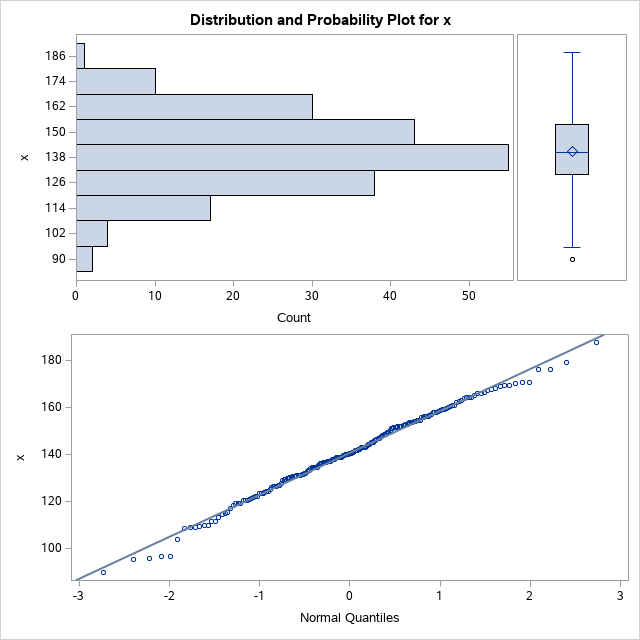

In [21]:
DATA simula1;
    do i = 1 to 200;
        x = 140 + 20*rannor(3452083);
        output;
    end;
RUN;
 
PROC UNIVARIATE data=simula1 plot;
    title1 'Simulated Normal Variate';
    title2 'with Mean 140 and Standard Deviation 20';
    var x;
RUN;

The **rannor** ( ) function returns a (pseudo) random number from a standard normal distribution with mean 0 and standard deviation 1. The x= assignment statement modifies the random number so that it comes from a normal distribution with mean 140 and standard deviation 20. The OUTPUT statement must be used to dump the random number after each iteration of the DO loop. If the OUTPUT function is not present, you would end up with only one random number, namely the last one generated. Incidentally, the **rannor** ( ) function is an alias for the **normal** ( ) function.
Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You should see a stem-and-leaf plot, a boxplot, and a normal probability plot that should make it believable that the data arose from a normal distribution. You might also want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 140 and 20, respectively, with a sample of just 200 observations.

### Example

The following program uses the **ranbin** (seed, n, p) function to generate a random sample of 20 observations from a binomial distribution with n = 20 and p = 0.5:


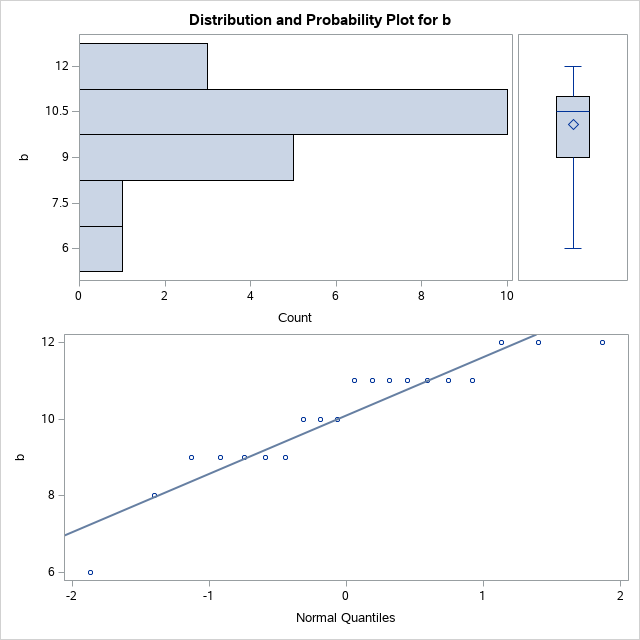

In [22]:
DATA simula2;
    do i = 1 to 20;
       b = ranbin(2340234,20,0.5);
       output;
    end;
RUN;
 
PROC UNIVARIATE data=simula2 plot;
    title1 'Simulated Binomial Variate';
    title2 'with n = 20 and p = 0.5';
    var b;
RUN;

Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You might want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 10 (np) and 2.24 (square root of np(1-p)), respectively, with a sample of just 20 observations.

### Example

The following program uses the **ranpoi** (seed, mean) function to generate a random sample of 200 observations from a Poisson distribution with a mean of 4:


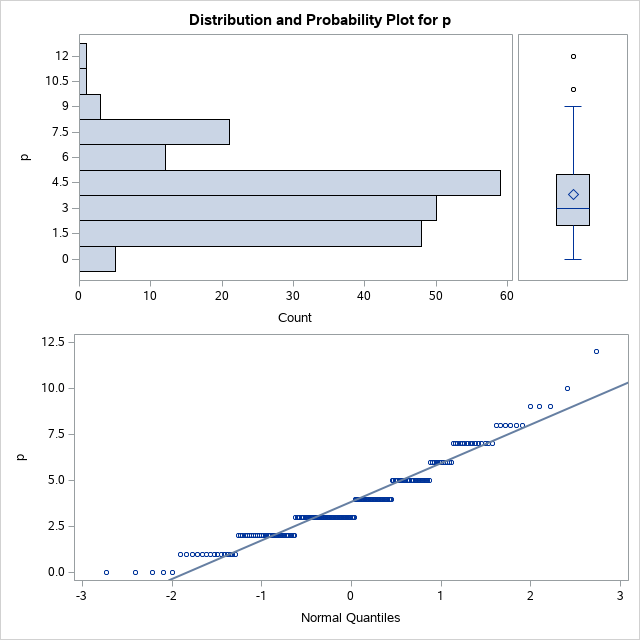

In [23]:
DATA simula3;
    do i = 1 to 200;
        p = ranpoi(67, 4);
        output;
    end;
RUN;
 
PROC UNIVARIATE data=simula3 plot;
    title 'Simulated Poisson Variate with Mean 4';
    var p;
RUN;

Launch and run the SAS program, so you can review the output from the UNIVARIATE procedure. You might want to check out the sample mean and sample standard deviation to see how (impressively) close they are to 4 and 2, respectively, with a sample of just 200 observations.

## Exercises

1. In this example, we will explore the sampling distribution of a sample proportion.
    a) Generate 500 sample of size 50 from a Binomial distribution with n = 1 and p = 0.3. Do this by generating a dataset with 500 rows and 50 columns all filled with random variates from this binomial distribution. Hint: Use an array and a nested DO loop.
    b) Calculate the mean of each of these 500 rows using mean(of ) in a DATA step. Save this mean as a new column.
    c) Plot a histogram of the 500 means calculated in part b and use PROC MEANS to calculate the MEAN and standard deviation of the 500 means calculated in part b. This describes the sampling distribution of p-hat when the population distiribution has probability of success p = 0.3 when the sample size is 30.